In [61]:
import numpy as np
import matplotlib.pyplot as plt

In [62]:
from oneVar import bisection
from scipy.optimize import bisect

# Métodos numéricos

<img src="figures/LogoCinvestav.png" style="height:100px" title="Cinvestav">

**CINVESTAV Unidad Saltillo**

**Curso Propedeutico del Programa de Maestría en Ciencias en Ingeniería Metalúrgica**

Dr. Edgar Ivan Castro Cedeño


Junio 2025

Contacto:
[edgar.castro@cinvestav.mx](mailto:edgar.castro@cinvestav.mx)

## 1.1 Algorítmo de bisección

### 1.1.1 Explicación del algorítmo

El algorítmo de bisección es un método iterativo acotado que permite encontrar la raíz de una función dentro del intervalo acotado, en caso que exista.

1. **Encontrar un intervalo inicial $[x_l, x_u]$ de tal forma que $f(x_l) f(x_u) < 0$.**
    - Esto garantiza que existe al menos una raíz dentro del intervalo.

2. **Cálcular el valor al punto medio del intervalo, $x_m = \frac{1}{2} (x_l + x_u)$.**
    - Es por esto que se le llama algorítmo de bisección.

3. **Determinar el nuevo intervalo donde se encuentra la raíz.**
    - Si $f(x_l) f(x_m) < 0$:
        - La raíz se encuentra en el intervalo inferior.
        - $x_u = x_m$.
    - De otra forma, si $f(x_l) f(x_m) > 0$:
        - La raíz se encuentra en el intervalo superior.
        - $x_l = x_m$.
    - Si $f(x_m) < \varepsilon_s$ (Tolerancia):
        - Entonces la raíz $x_r$, es aproximadamente igual a $x_m$.
        - $x_r \approx x_m$.

### 1.1.2 Implementación propia

Se utiliza la implementación del algoritmo de bisección escrita en la función `bisection()` dentro del archivo `oneVar.py`.

In [63]:
help(bisection)

Help on function bisection in module oneVar:

bisection(f, l, u, tol=None, niter=100)
    Basic bisection algorithm for finding the root of a one-variable equation
    
    Parameters
    ----------
    f : function
        Python function returning a number.  `f` must be continuous, and
        f(l) and f(u) must have opposite signs.
    l : scalar
        lower bound for the bisection method
    u : scalar
        upper bound for the bisection method
    tol : float
        Tolerance of the numerical method. Must be a positive number.
        Default is None, which means that convergence is not evaluated.
    niter : float
        maximum number of iterations of the method.
        Default value is 100.
    
    Returns
    -------
    m : float
        value of xm (midpoint) at the last iteration.
    n: float
        number of iterations of the method



#### Ejemplo: Función exponencial

In [64]:
# función a evaluar
f = lambda x: np.exp(-x) - x
# intervalo para acotar
l, u = -2, 2
# numero de iteraciones
niter = 5

  i  	 xi  		 f(xi)
  1	 0.000000e+00	 1.000000e+00
  2	 1.000000e+00	-6.321206e-01
  3	 5.000000e-01	 1.065307e-01
  4	 7.500000e-01	-2.776334e-01
  5	 6.250000e-01	-8.973857e-02


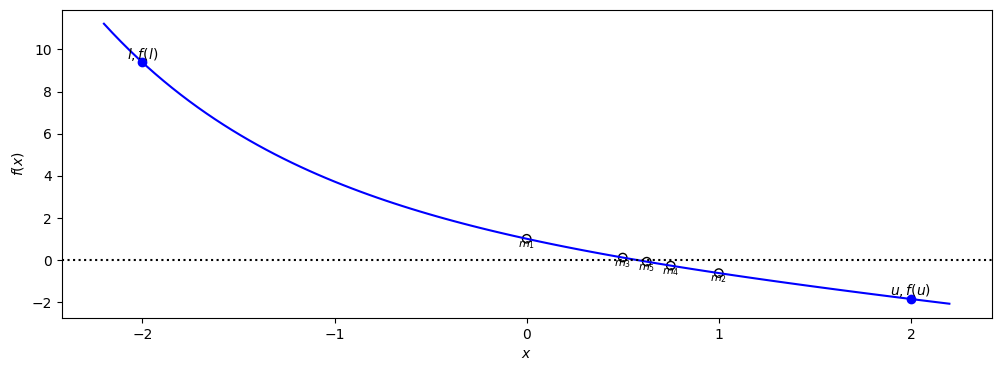

In [65]:
# Gráfico ilustrativo del método
fig, ax = plt.subplots(figsize=(12, 4))

# gráfico de la función
x = np.linspace(1.1*l, 1.1*u, 100)
ax.plot(x, f(x), color='b')
ax.axhline(0, ls=':', color='k')
ax.set(xlabel=r'$x$', ylabel=r'$f(x)$')

# delimitación del intervalo
ax.scatter([l, u], [f(l), f(u)], color='b')
ax.text(l, f(l), r"$l, f(l)$", ha='center', va='bottom')
ax.text(u, f(u), r"$u, f(u)$", ha='center', va='bottom')


print(f"  i  \t xi  \t\t f(xi)")
# graficar resultado de cada iteración
for its in range(1,niter+1):
    # método de bisección
    m, n = bisection(f, l, u, tol=None, niter=its)
    # gráfico
    ax.scatter(m, f(m), color='k', facecolor="None")
    ax.text(m, f(m), r"$m_{:d}$".format(n), fontsize=8,
            ha='center', va='top')
    # valores en pantalla
    print(f"{its:3}\t{m:13.6e}\t{f(m):13.6e}")

**Preguntas**: 

- ¿Tras cuántas iteraciones se obtiene una estimación aceptable de $x_r$?

- ¿Cuál es el efecto de especificar un criterio de convergencia más estricto sobre el número de iteraciones?

In [66]:
# lista con resultados
tols = np.logspace(0, -12, 13)
print(" its  tol       x         abs(f(x))")
for tol in tols:
    m, n = (bisection(f, l, u, tol=tol, niter=100))
    print(f"{n:4d}, {tol:.2e}, {m:.6f}, {abs(f(m)):12.6e}")

 its  tol       x         abs(f(x))
   2, 1.00e+00, 1.000000, 6.321206e-01
   5, 1.00e-01, 0.625000, 8.973857e-02
   6, 1.00e-02, 0.562500, 7.282825e-03
  12, 1.00e-03, 0.567383, 3.753492e-04
  14, 1.00e-04, 0.567139, 7.237912e-06
  14, 1.00e-05, 0.567139, 7.237912e-06
  22, 1.00e-06, 0.567143, 2.348157e-07
  25, 1.00e-07, 0.567143, 4.799769e-08
  27, 1.00e-08, 0.567143, 1.293185e-09
  32, 1.00e-09, 0.567143, 1.663308e-10
  35, 1.00e-10, 0.567143, 1.610856e-11
  38, 1.00e-11, 0.567143, 6.696310e-12
  40, 1.00e-12, 0.567143, 9.950929e-13


#### Ejemplo: Función trigonométrica

In [67]:
# función a evaluar
f = lambda x: np.sin(x)
# intervalo para acotar
l, u = -1, 2
# numero de iteraciones
niter = 5

  i  	 xi  		 f(xi)
  1	 5.000000e-01	 4.794255e-01
  2	-2.500000e-01	-2.474040e-01
  3	 1.250000e-01	 1.246747e-01
  4	-6.250000e-02	-6.245932e-02
  5	 3.125000e-02	 3.124491e-02


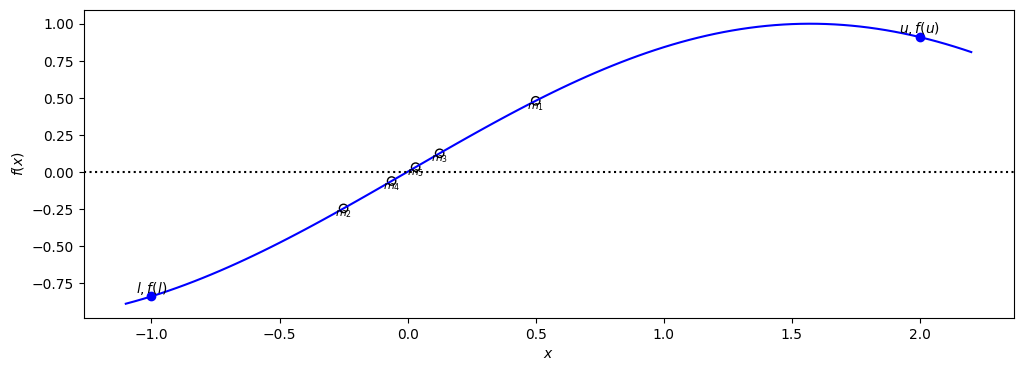

In [68]:
# Gráfico ilustrativo del método
fig, ax = plt.subplots(figsize=(12, 4))

# gráfico de la función
x = np.linspace(1.1*l, 1.1*u, 100)
ax.plot(x, f(x), color='b')
ax.axhline(0, ls=':', color='k')
ax.set(xlabel=r'$x$', ylabel=r'$f(x)$')

# delimitación del intervalo
ax.scatter([l, u], [f(l), f(u)], color='b')
ax.text(l, f(l), r"$l, f(l)$", ha='center', va='bottom')
ax.text(u, f(u), r"$u, f(u)$", ha='center', va='bottom')

print(f"  i  \t xi  \t\t f(xi)")
# graficar resultado de cada iteración
for its in range(1,niter+1):
    # método de bisección
    m, n = bisection(f, l, u, tol=None, niter=its)
    # gráfico
    ax.scatter(m, f(m), color='k', facecolor="None")
    ax.text(m, f(m), r"$m_{:d}$".format(n), fontsize=8,
            ha='center', va='top')
    # valores en pantalla
    print(f"{its:3}\t{m:13.6e}\t{f(m):13.6e}")

**Preguntas**: 

- ¿Qué sucede cuando se modifica el intervalo de acotamiento para encontrar la raíz?

- ¿Por qué es necesario implementar un criterio de convergencia al algorítmo de bisección?


In [69]:
tol = 1e-6
m, n = bisection(f, l, u, tol=tol, niter=100)
print(" its  tol       x         abs(f(x))")
print(f"{n:4d}, {tol:.2e}, {m:.6f}, {f(m):12.6e}")

 its  tol       x         abs(f(x))
  20, 1.00e-06, -0.000001, -9.536743e-07


### 1.1.3 Utilización del algoritmo de bisección implementado en `scipy`

In [70]:
help(bisect)

Help on function bisect in module scipy.optimize._zeros_py:

bisect(f, a, b, args=(), xtol=2e-12, rtol=np.float64(8.881784197001252e-16), maxiter=100, full_output=False, disp=True)
    Find root of a function within an interval using bisection.
    
    Basic bisection routine to find a root of the function `f` between the
    arguments `a` and `b`. `f(a)` and `f(b)` cannot have the same signs.
    Slow but sure.
    
    Parameters
    ----------
    f : function
        Python function returning a number.  `f` must be continuous, and
        f(a) and f(b) must have opposite signs.
    a : scalar
        One end of the bracketing interval [a,b].
    b : scalar
        The other end of the bracketing interval [a,b].
    xtol : number, optional
        The computed root ``x0`` will satisfy ``np.allclose(x, x0,
        atol=xtol, rtol=rtol)``, where ``x`` is the exact root. The
        parameter must be positive.
    rtol : number, optional
        The computed root ``x0`` will satisfy `

#### Ejemplo: Función exponencial

In [71]:
# función a evaluar
f = lambda x: np.exp(-x) - x
# intervalo para acotar
l, u = -2, 2
# tolerancia
tol = 1e-12

# cálculo de raíz por el método de bisección
xr = bisect(f, l, u, xtol=tol)
print(f"x={xr}, f(x)={f(xr)}")

x=0.5671432904100584, f(x)=-4.3021142204224816e-13


#### Ejemplo: Función trigonométrica

In [72]:
# función a evaluar
f = lambda x: np.sin(x)
# intervalo para acotar
l, u = -2, 2
# tolerancia
tol = 1e-3


# cálculo de raíz por el método de bisección
xr = bisect(f, l, u, xtol=tol)
print(f"x={xr}, f(x)={f(xr)}")

x=0.0, f(x)=0.0


#### Ejemplo: Ecuación cúbica de tercer grado (parametrizada)

In [73]:
def cubic(x, a, b, c, d):
    return a*(x)**3 + b*(x)**2 + c*x + d

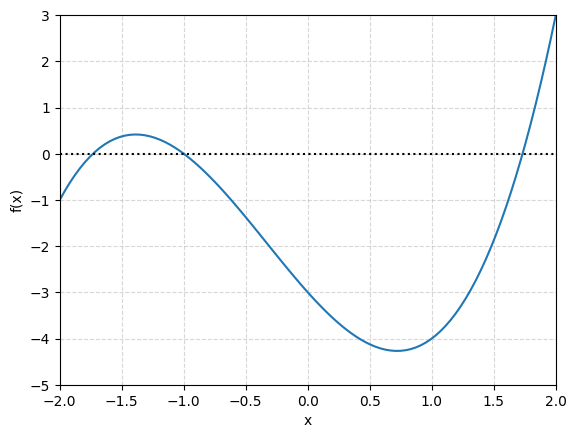

In [74]:
fig, ax = plt.subplots()

x = np.linspace(-2, 2, 100)
a, b, c, d = 1, 1, -3, -3
y = cubic(x, a, b, c, d)

ax.plot(x, y)
ax.axhline(0, ls=':', color='k')
ax.grid(ls='--', alpha=0.5)
ax.set(xlim=(-2, 2), ylim=(-5, 3), xlabel='x', ylabel='f(x)')
plt.show()

**Preguntas**:

- Gráficamente se observa que la ecuación tiene tres raíces. Encuéntrelas mediante el método de bisección.


In [75]:
xr = bisect(cubic, -2, -1.5, args=(a, b, c, d), xtol=1e-8)
print(f"x={xr}, f(x)={cubic(xr, a, b, c, d)}")

x=-1.7320508137345314, f(x)=-1.563547291638656e-08


In [76]:
xr = bisect(cubic, -1.5, -0.5, args=(a, b, c, d), xtol=1e-8)
print(f"x={xr}, f(x)={cubic(xr, a, b, c, d)}")

x=-1.0, f(x)=0.0


In [77]:
xr = bisect(cubic, 1, 2, args=(a, b, c, d), xtol=1e-8)
print(f"x={xr}, f(x)={cubic(xr, a, b, c, d)}")

x=1.7320508137345314, f(x)=5.835237715245967e-08
